In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# STEP 2: Load the data
train = pd.read_csv(r"C:\Users\grace\Downloads\train_LZdllcl.csv")
test = pd.read_csv(r"C:\Users\grace\Downloads\test_2umaH9m.csv")
sample = pd.read_csv(r"C:\Users\grace\Downloads\sample_submission_M0L0uXE.csv")

# STEP 3: Check the data
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()



Train shape: (54808, 14)
Test shape: (23490, 13)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [14]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB



Missing values in Train:
employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Missing values in Test:
employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


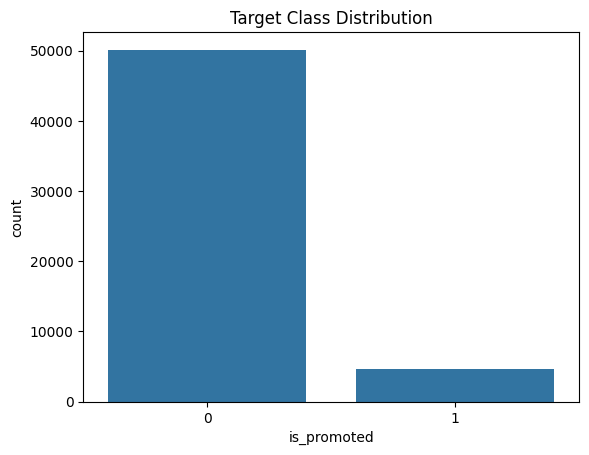

In [16]:
# Step 3: Check for Missing Values
print("\nMissing values in Train:")
print(train.isnull().sum())

print("\nMissing values in Test:")
print(test.isnull().sum())

# Check Target Variable Distribution
sns.countplot(x='is_promoted', data=train)
plt.title("Target Class Distribution")
plt.show()


In [17]:
# Step 4: Preprocessing

# Save target and drop from train
target = train['is_promoted']
train.drop(['employee_id', 'is_promoted'], axis=1, inplace=True)

# Save test IDs
test_ids = test['employee_id']
test.drop('employee_id', axis=1, inplace=True)

# Fill missing values
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].median())
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].median())


# One-Hot Encoding of Categorical Variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Align test with train (make columns match)
train, test = train.align(test, join='left', axis=1, fill_value=0)

print("✅ Preprocessing Done")


✅ Preprocessing Done


## RandomForestClassifier

In [18]:
# Step 5: Modeling

# Split for training and validation
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=42)

# Build the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on validation
val_preds = model.predict(X_val)
print("F1 Score on Validation:", f1_score(y_val, val_preds))


F1 Score on Validation: 0.43111831442463533


In [29]:
# Step 6: Prediction on Test Data
test_preds = model.predict(test)


In [24]:
# STEP 1: Load the sample submission file
sample = pd.read_csv(r"C:\Users\grace\Downloads\sample_submission_M0L0uXE.csv")

# STEP 2: Replace the 'is_promoted' column with your model's predictions
# (Make sure test_preds is already created using model.predict(test))
sample['is_promoted'] = test_preds

# STEP 3: Save this updated file as a new CSV
sample.to_csv("submission.csv", index=False)

print("✅ Final submission file 'submission.csv' created successfully!")


✅ Final submission file 'submission.csv' created successfully!


In [25]:
sample.to_csv(r"C:\Users\grace\Downloads\submission.csv", index=False)


##XGBoost Classifier  

In [ ]:
!pip install xgboost


In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Split data
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=42)

# Create XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on validation set
val_preds = xgb_model.predict(X_val)

# Evaluate
f1 = f1_score(y_val, val_preds)
print("✅ F1 Score on Validation Set:", f1)


c:\Users\grace\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:44:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ F1 Score on Validation Set: 0.5031847133757962


In [28]:
# Predict on test data
test_preds = model.predict(test)

# Add predictions to sample submission
sample['is_promoted'] = test_preds

# Save to Downloads folder
sample.to_csv(r"C:\Users\grace\Downloads\xgb_submission.csv", index=False)

print("✅ Final file saved at Downloads folder as 'xgb_submission.csv'")


✅ Final file saved at Downloads folder as 'xgb_submission.csv'


##Naive Bayes 

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
# Scale features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(train_scaled, target, test_size=0.2, random_state=42)
# Create and train model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on validation set
val_preds = nb_model.predict(X_val)

# Evaluate
f1 = f1_score(y_val, val_preds)
print("✅ F1 Score on Validation Set (Naive Bayes):", f1)


✅ F1 Score on Validation Set (Naive Bayes): 0.1682789197904071


Model	        F1 Score (Validation)
Naive Bayes 	0.1682 
Random Forest	0.4311 
XGBoost     	0.5032

Both Random Forest and XGBoost are good.